# Games (EDA)


The following notebook shows an exploratory data analysis using the data from the games file (after subjecting such file to some transformations and a cleaning process). 

In [87]:
#Necessary libraries

import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
from etl_functions import general_information, explode_column

In [88]:
df=pd.read_csv("cleaned_data/games_cleaned.csv")

In [89]:
df.head(5)

,publisher,genres,app_name,release_year,tags,specs,price,early_access,item_id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0,643980,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0,670290,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,0,767400,彼岸领域
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018,"['Action', 'Adventure', 'Simulation', 'FPS', '...","['Single-player', 'Steam Achievements']",3.99,0,772540,Trickjump Games Ltd


In [90]:
general_information(df)

,column,data_type,missing_values,missing_values_percentage
0,publisher,<class 'str'>,19,0.0
1,genres,<class 'str'>,0,0.0
2,app_name,<class 'str'>,0,0.0
3,release_year,<class 'str'>,0,0.0
4,tags,<class 'str'>,0,0.0
5,specs,<class 'str'>,0,0.0
6,price,<class 'str'>,13,0.0
7,early_access,<class 'str'>,0,0.0
8,item_id,<class 'str'>,0,0.0
9,developer,<class 'str'>,0,0.0


As we can see there are two columns containing lists as elements. In order to proceed with our analysis is necessary for us to arrange these columns.

In [91]:
df["genres"]=df["genres"].apply(ast.literal_eval)

In [92]:
df=explode_column(df,"genres")

In [93]:
df.head(5)

,publisher,genres,app_name,release_year,tags,specs,price,early_access,item_id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140,Kotoshiro
1,Kotoshiro,Casual,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140,Kotoshiro
2,Kotoshiro,Indie,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140,Kotoshiro
3,Kotoshiro,Simulation,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140,Kotoshiro
4,Kotoshiro,Strategy,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140,Kotoshiro


In [94]:
df["tags"]=df["tags"].apply(ast.literal_eval)

In [95]:
df=explode_column(df,"tags")

In [96]:
df.head(5)

,publisher,genres,app_name,release_year,tags,specs,price,early_access,item_id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,Strategy,['Single-player'],4.99,0,761140,Kotoshiro
1,Kotoshiro,Action,Lost Summoner Kitty,2018,Action,['Single-player'],4.99,0,761140,Kotoshiro
2,Kotoshiro,Action,Lost Summoner Kitty,2018,Indie,['Single-player'],4.99,0,761140,Kotoshiro
3,Kotoshiro,Action,Lost Summoner Kitty,2018,Casual,['Single-player'],4.99,0,761140,Kotoshiro
4,Kotoshiro,Action,Lost Summoner Kitty,2018,Simulation,['Single-player'],4.99,0,761140,Kotoshiro


In [97]:
df["specs"]=df["specs"].apply(ast.literal_eval)

In [98]:
df=explode_column(df,"specs")

In [99]:
df.head(5)

,publisher,genres,app_name,release_year,tags,specs,price,early_access,item_id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,Strategy,Single-player,4.99,0,761140,Kotoshiro
1,Kotoshiro,Action,Lost Summoner Kitty,2018,Action,Single-player,4.99,0,761140,Kotoshiro
2,Kotoshiro,Action,Lost Summoner Kitty,2018,Indie,Single-player,4.99,0,761140,Kotoshiro
3,Kotoshiro,Action,Lost Summoner Kitty,2018,Casual,Single-player,4.99,0,761140,Kotoshiro
4,Kotoshiro,Action,Lost Summoner Kitty,2018,Simulation,Single-player,4.99,0,761140,Kotoshiro


Once we have already arrange the data in a more appropiate format we can start exploring it.

In [100]:
#Top genres
df_genres=df["genres"].value_counts().reset_index()

In [101]:
df_genres

,genres,count
0,Indie,390955
1,Action,326654
2,Adventure,214008
3,Casual,148396
4,Strategy,147805
5,RPG,130323
6,Simulation,114042
7,Free to Play,55215
8,Early Access,48933
9,Sports,34537


In [102]:
df_genres.sort_values(by="count",ascending=True,inplace=True)

In [103]:
df_genres

,genres,count
20,Photo Editing,93
19,Audio Production,150
18,Video Production,256
17,Software Training,620
16,Education,1044
15,Animation &amp; Modeling,1424
14,Utilities,1685
13,Web Publishing,1756
12,Design &amp; Illustration,2278
11,Racing,27491


C:\Users\diego\AppData\Local\Temp\ipykernel_27992\2451254726.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Games genres')

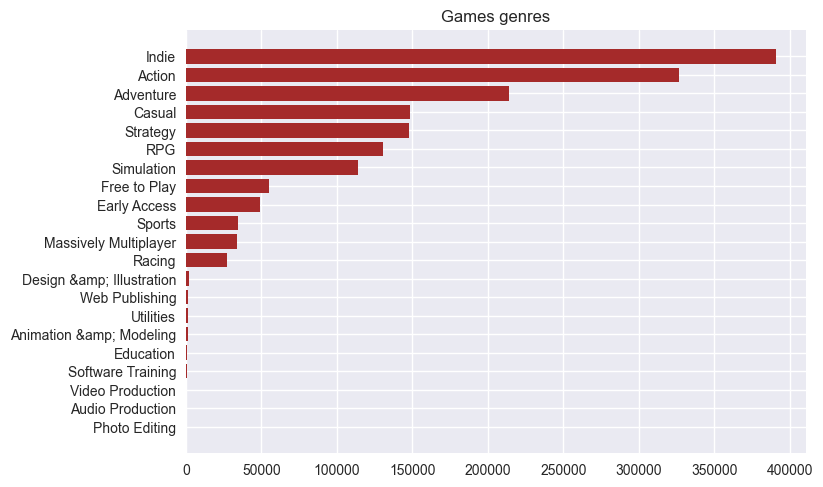

In [104]:
#Genres count
plt.style.use("seaborn")
plt.barh(df_genres["genres"],df_genres["count"],color="brown")
plt.title("Games genres")

In [105]:
#Top 10 years
df_year=df["release_year"].value_counts().reset_index()

In [106]:
df_year.head(5)

,release_year,count
0,2017,510069
1,2016,439451
2,2015,307876
3,2014,179262
4,2013,90327


In [107]:
df_tp10=df_year.loc[:9,:]

In [108]:
df_tp10.head(5)

,release_year,count
0,2017,510069
1,2016,439451
2,2015,307876
3,2014,179262
4,2013,90327


In [109]:
df_tp10.sort_values(by="count",ascending=True,inplace=True,ignore_index=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_27992\3945581837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10.sort_values(by="count",ascending=True,inplace=True,ignore_index=True)


In [110]:
df_tp10

,release_year,count
0,2008,5446
1,2009,10730
2,2010,17064
3,2011,30887
4,2012,54744
5,2013,90327
6,2014,179262
7,2015,307876
8,2016,439451
9,2017,510069


C:\Users\diego\AppData\Local\Temp\ipykernel_27992\2363915882.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 years')

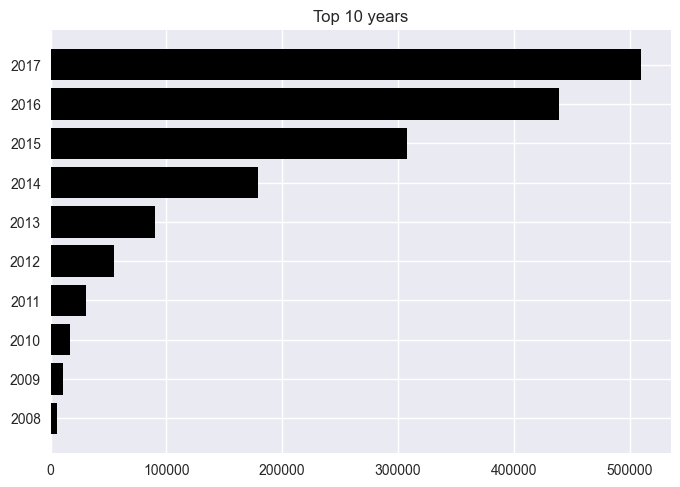

In [127]:
#Top 10 years 
plt.style.use("seaborn")
plt.barh(df_tp10["release_year"],df_tp10["count"],color="black")
plt.title("Top 10 years")

The previous graph shows the ten years during which more products were delivered to the platform.

In [115]:
df_c=df.copy()

In [116]:
df_c.head(5)

,publisher,genres,app_name,release_year,tags,specs,price,early_access,item_id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,Strategy,Single-player,4.99,0,761140,Kotoshiro
1,Kotoshiro,Action,Lost Summoner Kitty,2018,Action,Single-player,4.99,0,761140,Kotoshiro
2,Kotoshiro,Action,Lost Summoner Kitty,2018,Indie,Single-player,4.99,0,761140,Kotoshiro
3,Kotoshiro,Action,Lost Summoner Kitty,2018,Casual,Single-player,4.99,0,761140,Kotoshiro
4,Kotoshiro,Action,Lost Summoner Kitty,2018,Simulation,Single-player,4.99,0,761140,Kotoshiro


In [117]:
df_c.drop_duplicates(subset="app_name",keep="first",inplace=True,ignore_index=True)

In [118]:
df_c.head(5)

,publisher,genres,app_name,release_year,tags,specs,price,early_access,item_id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,Strategy,Single-player,4.99,0,761140,Kotoshiro
1,"Making Fun, Inc.",Free to Play,Ironbound,2018,Free to Play,Single-player,0.00,0,643980,Secret Level SRL
2,Poolians.com,Casual,Real Pool 3D - Poolians,2017,Free to Play,Single-player,0.00,0,670290,Poolians.com
3,彼岸领域,Action,弹炸人2222,2017,Action,Single-player,0.99,0,767400,彼岸领域
4,Trickjump Games Ltd,Action,Battle Royale Trainer,2018,Action,Single-player,3.99,0,772540,Trickjump Games Ltd


In [121]:
df_dev=df_c["developer"].value_counts().reset_index()

In [122]:
df_dev.head(5)

,developer,count
0,Dovetail Games,253
1,"KOEI TECMO GAMES CO., LTD.",180
2,Ubisoft - San Francisco,178
3,Capcom,107
4,Paradox Development Studio,97


In [123]:
df_tp10_dev=df_dev.loc[0:9,:]

In [124]:
df_tp10_dev

,developer,count
0,Dovetail Games,253
1,"KOEI TECMO GAMES CO., LTD.",180
2,Ubisoft - San Francisco,178
3,Capcom,107
4,Paradox Development Studio,97
5,Stainless Games,83
6,DL Softworks,78
7,"Relic Entertainment,Feral Interactive (Mac),Fe...",77
8,Choice of Games,76
9,SCS Software,73


In [125]:
df_tp10_dev.sort_values(by="count",inplace=True,ascending=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_27992\485333504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_dev.sort_values(by="count",inplace=True,ascending=True)


C:\Users\diego\AppData\Local\Temp\ipykernel_27992\1131310136.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 developers')

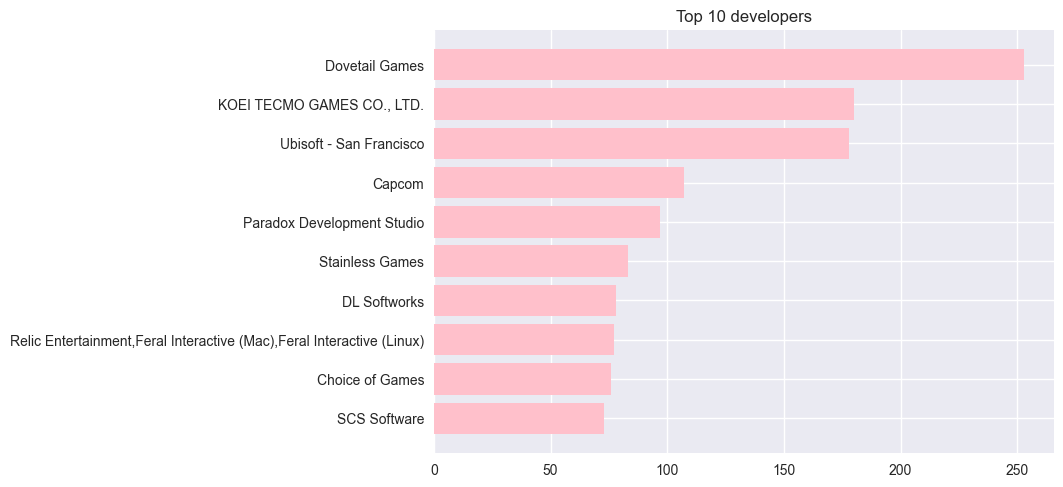

In [128]:
plt.style.use("seaborn")
plt.barh(df_tp10_dev["developer"],df_tp10_dev["count"],color="pink")
plt.title("Top 10 developers")

In [137]:
df_pub=df_c["publisher"].value_counts().reset_index()

In [138]:
df_top10_pub=df_pub.loc[0:9,:]

In [139]:
df_top10_pub.sort_values(by="count",ascending=True,inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_27992\92529627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10_pub.sort_values(by="count",ascending=True,inplace=True)


In [140]:
df_top10_pub

,publisher,count
9,KISS ltd,177
8,"KOEI TECMO GAMES CO., LTD.",192
7,Big Fish Games,194
6,Activision,201
5,SEGA,215
4,Dovetail Games - Flight,220
3,Paradox Interactive,262
2,Degica,266
1,Dovetail Games - Trains,358
0,Ubisoft,366


C:\Users\diego\AppData\Local\Temp\ipykernel_27992\3309337322.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 publishers')

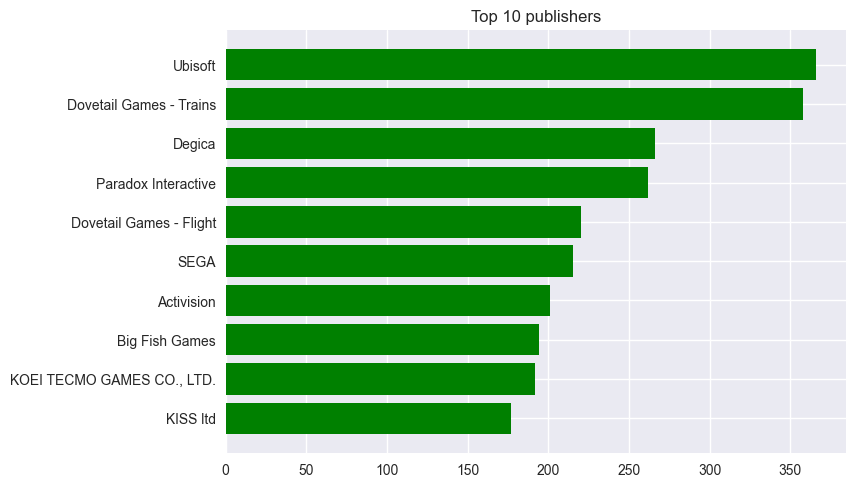

In [141]:
plt.style.use("seaborn")
plt.barh(df_top10_pub["publisher"],df_top10_pub["count"],color="green")
plt.title("Top 10 publishers")